# Bloch Equation Simulation 
### An implementation of Bloch equations that describes the behaviour of the bulk magnetization 

Main importations

In [1]:
import bloch as b  # a Class which is implemented in it`s own module 
import numpy as np
from matplotlib.animation import FuncAnimation
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook

##### instantation of the main class responsible for the calculations needed and printing the accopanied doc string 
###### the file can be tracked here [Bloch](bloch.py)

In [15]:
T1 = 900*10**-3
T2 = 50*10**-3
M0 =1.5

In [16]:
m = b.magentization(T1, T2, M0)
print(b.magentization.__doc__)


    Responsible for calculating the magnetization vector.
    Implements the following:
    * calculate the magnetization vector after application of Mo [0 0 Mo]
    * Returns the vector into its relaxation state
    


#### we searched for T1 and T2 values for different tissues and found many results 
##### the values we tried are from this link https://mri-q.com/why-is-t1--t2.html
![T1T2](https://mri-q.com/uploads/3/4/5/7/34572113/5092979_orig.gif)

#### applied an RF pulse for 1 sec 

In [17]:
m.rotate(1)
print(m.rotate.__doc__)


        Rotates the magnetization vector by application of an RF pulse for a given time t
        ================== =================================================
        **Parameters**
        t                  Time in seconds
        ================== =================================================
        


## plotting 

### The following chunck of code is repsonsible for making an annimation of the bulk magnetization\`s trajectory 
- using matplotlin funcanimation and quiver for 3d plotting 
- the plot is initialized with the first values returned from the rotations of the vector 
- an update function is given for FuncAnimation which updates the plot\`s data with the next value to show in the next frame 

<IPython.core.display.Javascript object>


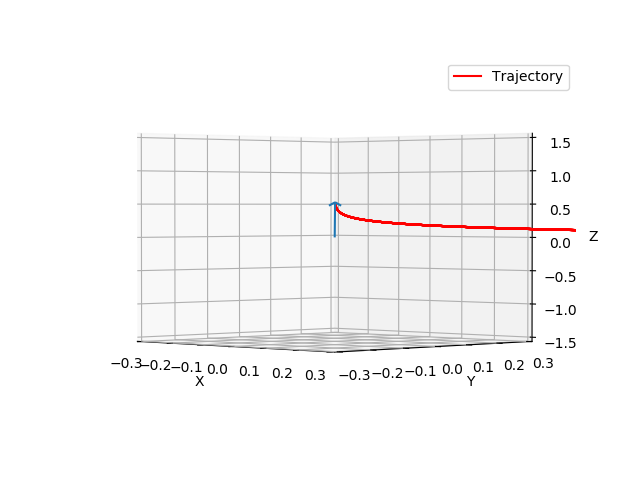

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Origin
x, y, z = (0, 0, 0)

# Initizalizing plot
# Directions of the vector 
u = m.vector[0, 0]  # x Component 
v = m.vector[0, 1]  # y Component
w = m.vector[0, 2]   # z Component 

quiver = ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.1, color="red")
ax.plot(m.vector[:0, 0], m.vector[:0, 1], m.vector[:0, 2], color='r', label="Trajectory")

def update(t):
    global quiver
    u = m.vector[t, 0]
    v = m.vector[t, 1]
    w = m.vector[t, 2]
    quiver.remove()
    quiver= ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.1)
    ax.plot(m.vector[:t, 0], m.vector[:t, 1], m.vector[:t, 2], color='r', label="Trajectory")
    
ax.set_xlim3d([-0.3, 0.3])
ax.set_xlabel('X')

ax.set_ylim3d([-0.3, 0.3])
ax.set_ylabel('Y')

ax.set_zlim3d([-1.5, 1.5])
ax.set_zlabel('Z')

ax.view_init(elev= 0.9, azim=-45)
ani = FuncAnimation(fig, update, frames=np.arange(0, 100), interval=200, blit= True)
ax.legend()
# ani.save("magnetization.gif")
plt.show()

##### Note : the animation is interactive on Jupyter

### Third Part 
#### Applying fourier Transform on an image 

###### importing a class made for the image's loading and performing fourier tranfsorm 

In [5]:
import image  # a class for image`s processes 

In [6]:
imageSlice = image.image()
print(image.image().__doc__)


    Responsible for all interactions with images.
    Implements the following:
    * Loading the image data to the class
    * Apply Fourier Transformation to the image
    * Extract the following components from the transformations :
        - Real Component
        - Imaginary Component
        - Phase
        - Magnitude
    


In [7]:
imageSlice.loadImage("78146.png", greyScale=False)
print(imageSlice.loadImage.__doc__)

the image loaded shape is  (230, 230, 3)

        Implements the following:
        * Loading the image from specified path
        * Normalize the image values
        ================== =============================================================================
        **Parameters**
        Path               a string specifying the absolute path to image, if provided loads this image
                           to the class`s data
        data               numpy array if provided loads this data directly
        fourier            numpy array if provided loads the transformed data
        imageShape         a tuple of ints identifying the image shape if any method is used except using
                           path
        greyScale          if True the image is transformed to greyscale via OpenCV`s convert image tool
        ================== =============================================================================
        


##### Showing the image loaded 

<IPython.core.display.Javascript object>


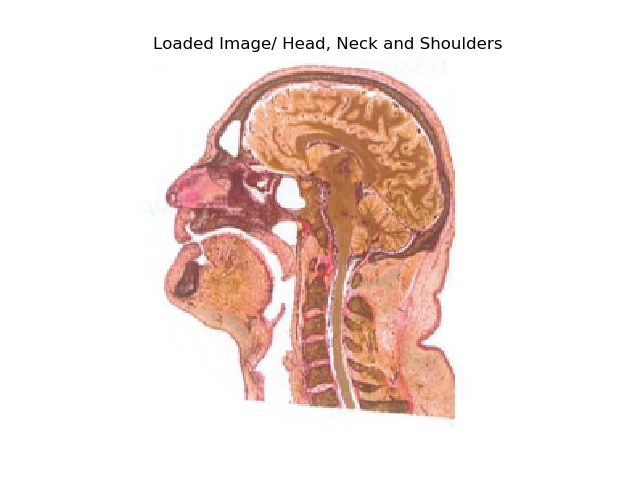

In [8]:
fig2 = plt.figure()
plt.title("Loaded Image/ Head, Neck and Shoulders")
plt.axis("off")
plt.imshow(imageSlice.imageData)

### the following are a plots if the image\`s fourier transform magnitude and phase components 

<IPython.core.display.Javascript object>


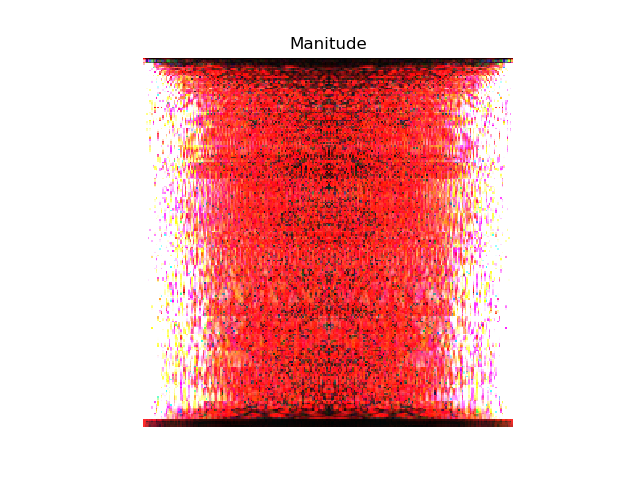

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [9]:
imageSlice.fourierTransform()
fig3 = plt.figure()
plt.title("Manitude")
plt.axis("off")
plt.imshow(imageSlice.magnitude())

<IPython.core.display.Javascript object>


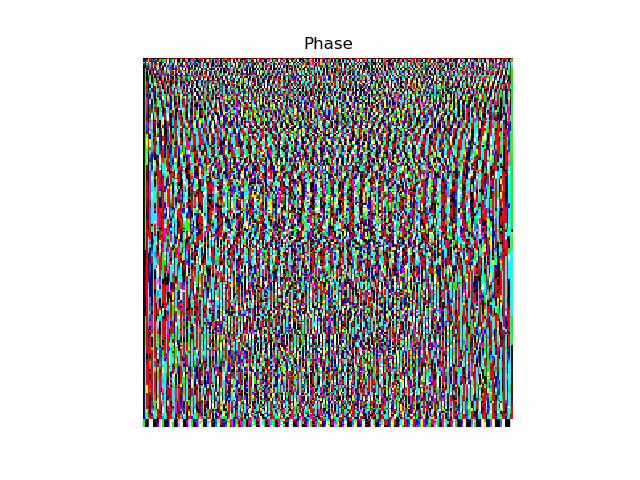

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [10]:
fig4 = plt.figure()
plt.title("Phase")
plt.axis("off")
plt.imshow(imageSlice.phase())

In [11]:
print("Function`s description")
print("imageSlice.fourierTransform: ")
print(imageSlice.fourierTransform.__doc__)
print("imageSlice.magnitude:")
print(imageSlice.magnitude.__doc__)
print("imageSlice.phase: ")
print(imageSlice.phase.__doc__)

Function`s description
imageSlice.fourierTransform: 

        Applies Fourier Transform on the data of the image and save it in the specified attribute
        ================== ===========================================================================
        **Parameters**
        shifted            If True will also apply the shifted Fourier Transform
        ================== ===========================================================================
        
imageSlice.magnitude:

        Extracts the image`s Magnitude Spectrum from the image`s Fourier data
        ================== ===========================================================================
        **Parameters**
        LodScale           If True returns 20 * np.log(ImageFourier)
        ================== ===========================================================================
        **Returns**
        array              a numpy array of the extracted data
        ================== ====================

### Fourth Part 
#### Visualizing the Field\`s in-uniformity   

In [12]:
field = 3.0  # Tesla 
delta = 0.5

In [13]:
Bz = np.random.uniform(field-delta, field+delta, size=10)

<IPython.core.display.Javascript object>


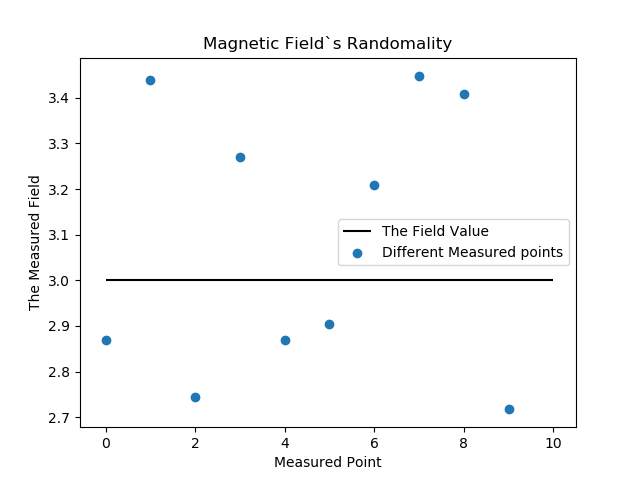

In [14]:
fig5 = plt.figure()
plt.title("Magnetic Field`s Randomality")
plt.xlabel("Measured Point")
plt.ylabel("The Measured Field")
plt.hlines(3,0, 10, label="The Field Value")
plt.scatter(range(0, 10), Bz, label="Different Measured points")
plt.legend()